In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)


Δημιουργήθηκε dataframe για το Poland_Stages_Times_Sec.csv με (840, 7)
Δημιουργήθηκε dataframe για το Roma Capitale_Stages_Times_Sec.csv με (1092, 7)
Δημιουργήθηκε dataframe για το Canarias_Stages_Times_Sec.csv με (737, 7)
Δημιουργήθηκε dataframe για το Latvia_Stages_Times_Sec.csv με (499, 7)
Δημιουργήθηκε dataframe για το Scandinavia_Stages_Times_Sec.csv με (671, 7)
Δημιουργήθηκε dataframe για το Portugal_Stages_Times_Sec.csv με (676, 7)
Δημιουργήθηκε dataframe για το Czech Barum_Stages_Times_Sec.csv με (1214, 7)


In [2]:
min_value = total.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race        ss          
Canarias    1       99.8
            2      535.7
            3      366.0
            4      673.7
            5      526.4
...                  ...
Scandinavia 12     284.8
            13     279.6
            14     256.2
            15     320.6
            16     279.8

[94 rows x 1 columns]

In [3]:
total_ss_times_F = total.merge(min_value2, on=['Race', 'ss'])
total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.
0,6,Marczyk M,RC2,1,Poland,1,107.7,107.7,Poland_01
1,1,Paddon Ha,RC2,1,Poland,2,108.6,107.7,Poland_01
2,22,Cais Erik,RC2,1,Poland,3,108.8,107.7,Poland_01
3,2,Llarena E,RC2,1,Poland,4,109.0,107.7,Poland_01
4,11,Grzyb Grz,RC2,1,Poland,5,109.7,107.7,Poland_01
...,...,...,...,...,...,...,...,...,...
5724,116,Chlud Iva,RN6,13,Czech Barum,73,801.4,557.7,Czech Barum_13
5725,114,Hock Kare,RN10,13,Czech Barum,74,815.1,557.7,Czech Barum_13
5726,92,Pilka Mar,RN7,13,Czech Barum,75,871.8,557.7,Czech Barum_13
5727,99,Pavič Pet,RN10,13,Czech Barum,76,911.2,557.7,Czech Barum_13


In [4]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,6,Marczyk M,RC2,1,Poland,1,107.7,107.7,Poland_01,0.0,0.000000
1,1,Paddon Ha,RC2,1,Poland,2,108.6,107.7,Poland_01,0.9,0.835655
2,22,Cais Erik,RC2,1,Poland,3,108.8,107.7,Poland_01,1.1,1.021356
3,2,Llarena E,RC2,1,Poland,4,109.0,107.7,Poland_01,1.3,1.207057
4,11,Grzyb Grz,RC2,1,Poland,5,109.7,107.7,Poland_01,2.0,1.857010
...,...,...,...,...,...,...,...,...,...,...,...
5724,116,Chlud Iva,RN6,13,Czech Barum,73,801.4,557.7,Czech Barum_13,243.7,43.697328
5725,114,Hock Kare,RN10,13,Czech Barum,74,815.1,557.7,Czech Barum_13,257.4,46.153846
5726,92,Pilka Mar,RN7,13,Czech Barum,75,871.8,557.7,Czech Barum_13,314.1,56.320602
5727,99,Pavič Pet,RN10,13,Czech Barum,76,911.2,557.7,Czech Barum_13,353.5,63.385333


In [5]:
total_ss_times_WRC = total_ss_times_F[total_ss_times_F['Group'].str.contains('RC2')]
total_ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,6,Marczyk M,RC2,1,Poland,1,107.7,107.7,Poland_01,0.0,0.000000
1,1,Paddon Ha,RC2,1,Poland,2,108.6,107.7,Poland_01,0.9,0.835655
2,22,Cais Erik,RC2,1,Poland,3,108.8,107.7,Poland_01,1.1,1.021356
3,2,Llarena E,RC2,1,Poland,4,109.0,107.7,Poland_01,1.3,1.207057
4,11,Grzyb Grz,RC2,1,Poland,5,109.7,107.7,Poland_01,2.0,1.857010
...,...,...,...,...,...,...,...,...,...,...,...
5671,25,Cuzma Bog,RC2,13,Czech Barum,20,609.6,557.7,Czech Barum_13,51.9,9.306079
5684,24,Somaschini,RC2,13,Czech Barum,33,631.0,557.7,Czech Barum_13,73.3,13.143267
5687,54,László Z.,RC2,13,Czech Barum,36,636.5,557.7,Czech Barum_13,78.8,14.129460
5689,55,Titov Ant,RC2,13,Czech Barum,38,644.4,557.7,Czech Barum_13,86.7,15.545992


In [6]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_WRC, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)
total_ss_times_F4

Crew                        Al-Rashed   Allen  Phi  Almeida  P  Andolfi  F  \
Race        SS.                                                              
Canarias    Canarias_01            NaN       600.0         NaN         NaN   
            Canarias_02            NaN         NaN         NaN         NaN   
            Canarias_03            NaN         NaN         NaN         NaN   
            Canarias_04            NaN         NaN         NaN         NaN   
            Canarias_05            NaN         NaN         NaN         NaN   
...                                ...         ...         ...         ...   
Scandinavia Scandinavia_12        33.7         NaN         NaN         NaN   
            Scandinavia_13        26.4         NaN         NaN         NaN   
            Scandinavia_14        27.2         NaN         NaN         NaN   
            Scandinavia_15        26.8         NaN         NaN         NaN   
            Scandinavia_16        34.6         NaN         NaN         NaN   

Crew                        Angelucci   Aragno  F.  Araújo  Ar  Ares  Iván  \
Race        SS.                                                              
Canarias    Canarias_01            NaN         NaN         NaN         3.2   
            Canarias_02            NaN         NaN         NaN        20.1   
            Canarias_03            NaN         NaN         NaN         5.6   
            Canarias_04            NaN         NaN         NaN        10.9   
            Canarias_05            NaN         NaN         NaN         7.7   
...                                ...         ...         ...         ...   
Scandinavia Scandinavia_12         NaN         NaN         NaN         NaN   
            Scandinavia_13         NaN         NaN         NaN         NaN   
            Scandinavia_14         NaN         NaN         NaN         NaN   
            Scandinavia_15         NaN         NaN         NaN         NaN   
            Scandinavia_16         NaN         NaN         NaN         NaN   

Crew                        Armstrong   Avbelj  Bo  ...  Wagner  Si  \
Race        SS.                                     ...               
Canarias    Canarias_01            NaN         NaN  ...         0.7   
            Canarias_02            NaN         NaN  ...        24.3   
            Canarias_03            NaN         NaN  ...        11.9   
            Canarias_04            NaN         NaN  ...        19.0   
            Canarias_05            NaN         NaN  ...         6.2   
...                                ...         ...  ...         ...   
Scandinavia Scandinavia_12        12.3         NaN  ...         NaN   
            Scandinavia_13        13.0         NaN  ...         NaN   
            Scandinavia_14        10.7         NaN  ...         NaN   
            Scandinavia_15        10.7         NaN  ...         NaN   
            Scandinavia_16        10.3         NaN  ...         NaN   

Crew                        Windisch    Zakmans  I  Zaldivar    Zedník  Pe  \
Race        SS.                                                              
Canarias    Canarias_01            NaN         NaN         NaN         NaN   
            Canarias_02            NaN         NaN         NaN         NaN   
            Canarias_03            NaN         NaN         NaN         NaN   
            Canarias_04            NaN         NaN         NaN         NaN   
            Canarias_05            NaN         NaN         NaN         NaN   
...                                ...         ...         ...         ...   
Scandinavia Scandinavia_12         NaN         NaN         NaN         NaN   
            Scandinavia_13         NaN         NaN         NaN         NaN   
            Scandinavia_14         NaN         NaN         NaN         NaN   
            Scandinavia_15         NaN         NaN         NaN         NaN   
            Scandinavia_16         NaN         NaN         NaN         NaN   

Crew                        von

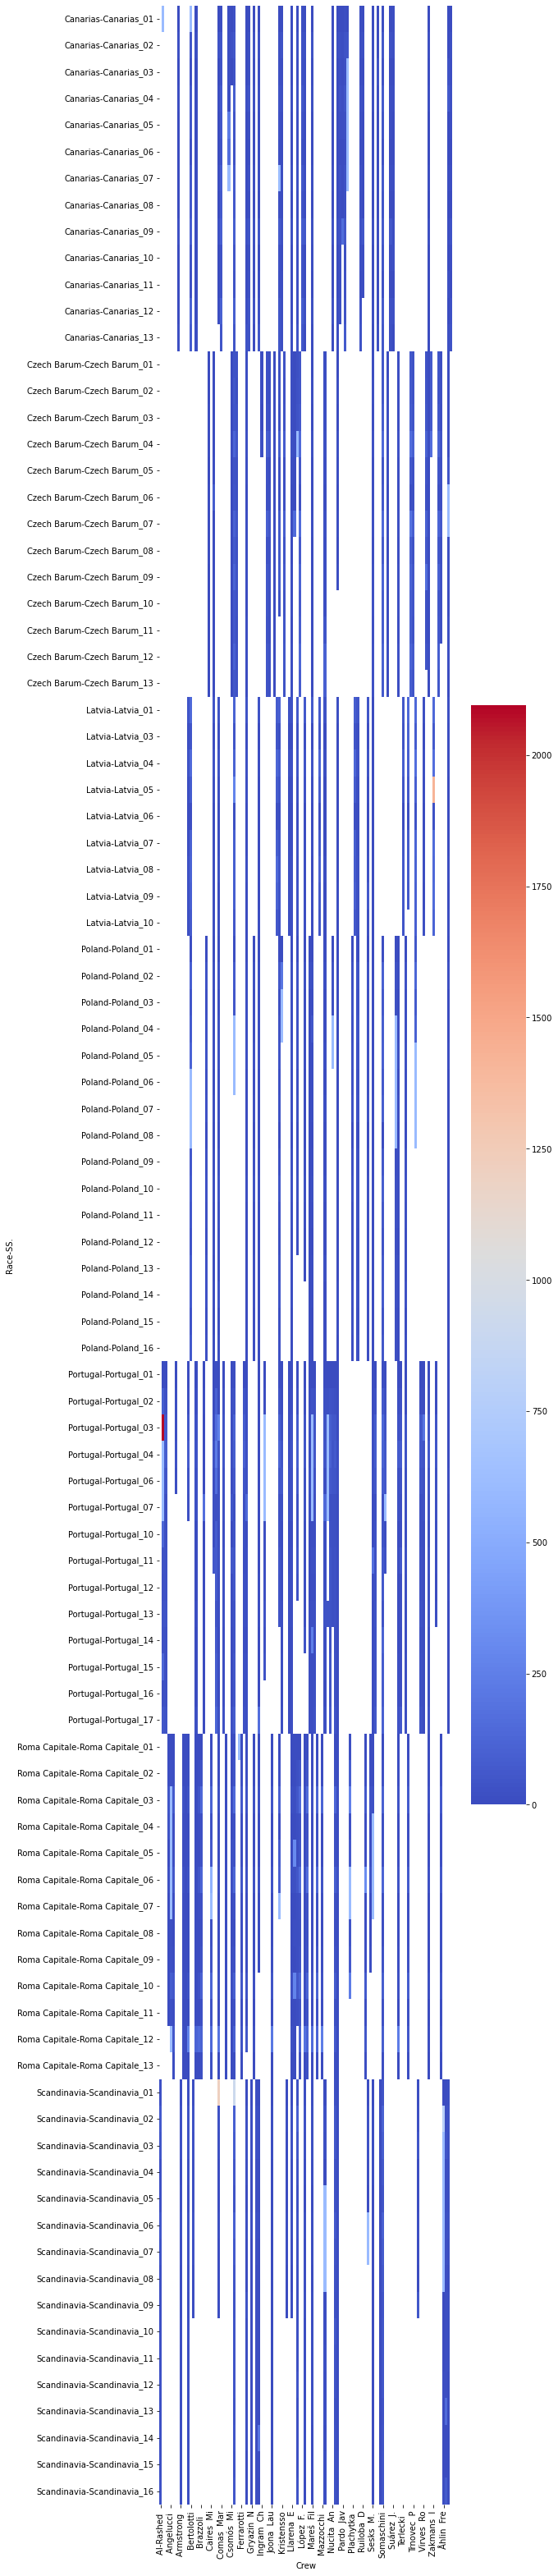

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(8,56)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("Rc2.jpg")
plt.show()